In [1]:
import sys
sys.path.append('../../')
sys.path.append('../')

dataset_path = "../dataset"
preprocessed_dataset_path = "../dataset/preprocessed_dataset"

from codes.docs.analysis import data_preprocessing, genetic_file_preprocess
from codes.docs.analysis.nimagen import genes, stats

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import glob
from collections import defaultdict
%matplotlib inline

In [2]:
dHCP_participant_info = pd.read_table('../codes/FBA/dHCP_participant_info.csv')

In [3]:
dHCP_participant_info = dHCP_participant_info.rename(columns={'birth_age':'GA','scan_age':'PMA'})

In [4]:
dHCP_participant_info ['termness'] = genetic_file_preprocess.Cohort.get_termness(dHCP_participant_info)

In [5]:
dHCP_participant_info = dHCP_participant_info[(dHCP_participant_info['termness']=='preterm/term_at_scan') | (dHCP_participant_info['termness']=='term')].copy()

In [39]:
preterm, term = stats.Stability_tests.nn_matching(dHCP_participant_info,
                                 cont_independentVar_cols=['PMA'],
                                  dependentVar_cols=['termness'])

In [40]:
dHCP_term_preterm = pd.concat([preterm,term])

<AxesSubplot:xlabel='PMA', ylabel='Count'>

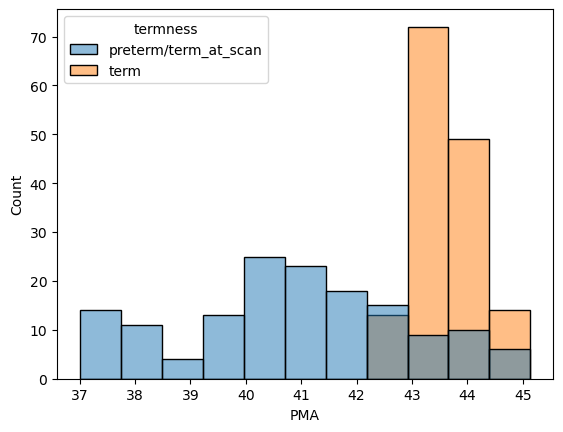

In [41]:
sns.histplot(data=dHCP_term_preterm,x='PMA',hue='termness')

In [15]:
term

,participant_id,session_id,scan_number,singleton,sedation,GA,PMA,sex,birth_weight,head_circumference_scan,...,qc_fmri_dvars_z,qc_fmri_tsnr_z,qc_fmri_mcdc2sbref_z,qc_fmri_sbref2struct_z,qc_fmri_fmap2struct_z,qc_fmri_standard2struct_z,qc_fmri_flagged,qc_fmri_comment,qc_smri_pipeline_status,termness
142,CC00184XX12,60501,1,S,False,41.285714,44.71,female,3.700,36.5,...,-0.340209,-0.629602,0.095830,-0.002215,-0.718342,-1.149967,False,NaN,full,term
706,CC00883XX18,14430,1,S,False,38.857143,44.71,female,3.900,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full,term
765,CC00973XX17,66030,1,S,False,42.000000,44.71,female,4.015,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full,term
849,CC01145XX16,98330,1,S,False,37.714286,44.71,female,2.470,35.8,...,-0.479519,-0.428616,-1.146727,-1.625888,-1.448489,-0.677264,False,NaN,full,term
255,CC00316XX11,101300,1,S,False,41.857143,44.43,female,3.852,37.4,...,-0.853012,-0.197298,-0.476072,1.395517,0.720029,-0.093988,False,NaN,full,term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,CC00097XX16,33701,1,S,False,42.000000,42.57,female,3.590,34.5,...,-0.364113,-0.869392,-0.868313,-1.280332,-2.143411,-2.399451,False,NaN,full,term
61,CC00108XX09,36800,1,S,False,40.000000,42.57,female,3.320,35.5,...,0.918490,1.202766,0.191813,0.693328,0.711597,0.017968,False,NaN,full,term
372,CC00444XX16,135101,1,S,False,41.714286,42.57,female,3.550,36.0,...,-0.254758,0.081054,-0.351171,-0.837310,-1.841385,-0.888737,False,NaN,full,term
654,CC00815XX15,4120,1,S,False,37.714286,42.57,female,2.850,36.0,...,-0.714497,-0.651162,-0.052453,0.206005,0.124783,-0.492053,False,NaN,full,term


In [11]:
distance = g1[646] - g2

In [17]:
distance.min()

-0.04658329028558805

In [25]:
distance.index[distance.argmin()]

126

In [24]:
g1[646]-g2[126]

-0.04658329028558805

In [15]:
g2.drop()

KeyError: '[99] not found in axis'

In [7]:
groups

,termness,propensity
0,term,0.846323
1,term,0.775914
2,term,0.742702
3,term,0.786282
4,term,0.814428
...,...,...
725,preterm/term_at_scan,0.846323
726,term,0.757001
727,term,0.796297
728,term,0.866092


In [10]:

groups.loc[groups['termness']==np.unique(y)[0],'propensity']

30     0.693115
31     0.771731
37     0.788891
46     0.771731
61     0.820531
         ...   
704    0.781999
718    0.775914
721    0.775191
722    0.705863
725    0.846323
Name: propensity, Length: 148, dtype: float64

In [146]:
dHCP_participant_info[['birth_age','sex','birth_weight','head_circumference_scan','termness']]

,birth_age,sex,birth_weight,head_circumference_scan,termness
0,43.000000,female,3.910,37.0,term
1,39.857143,female,3.310,35.0,term
2,38.000000,female,2.640,33.0,term
3,40.000000,female,3.460,32.0,term
4,41.857143,male,3.690,35.0,term
...,...,...,...,...,...
876,33.285714,female,1.310,35.0,preterm/term_at_scan
877,39.428571,male,3.140,35.5,term
879,38.714286,female,2.760,35.7,term
885,40.714286,female,3.675,36.5,term


In [270]:
y, X = stats.MassUnivariate.prepare_data(dHCP_participant_info,
                                  cat_independentVar_cols=['sex'],
                                  cont_independentVar_cols=['birth_age'],
                                  dependentVar_cols=['termness'],scaling='x')

In [271]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y.values.reshape(-1))

LogisticRegression()

In [272]:
propensity = log_reg.predict_proba(X)[:,1] # prediction of the larger class

In [274]:
len(y)

730

In [286]:
y.index

RangeIndex(start=0, stop=730, step=1)

In [289]:
y['number'] = np.arange(0,730)

In [297]:
(y.loc[0,'number'] - y['number']).argmin()

729

In [287]:
for idx in y.sample(frac=1).index:
    print(idx)

388
29
477
568
0
454
318
589
350
154
279
631
362
647
217
582
462
126
137
673
8
214
382
77
143
42
41
729
234
5
54
115
35
597
73
111
330
686
370
171
323
713
456
256
134
229
705
18
263
645
352
67
218
96
594
228
95
343
543
681
449
455
153
366
65
591
363
233
574
664
184
701
88
39
11
130
34
660
189
131
698
465
123
475
605
356
547
626
608
482
717
507
413
425
37
97
20
655
596
249
242
165
28
448
267
506
480
146
666
247
180
694
15
550
81
663
288
490
553
191
353
539
542
504
451
220
680
556
546
411
118
561
427
30
409
321
560
426
549
292
524
163
415
198
24
659
138
102
332
12
460
230
227
219
129
381
510
479
36
119
652
636
2
580
653
522
46
44
106
638
178
483
239
412
128
348
593
192
688
433
566
121
244
607
650
328
624
541
339
654
445
641
500
365
19
721
555
113
422
50
202
245
635
93
367
359
637
272
132
464
277
573
186
300
459
6
266
232
142
122
691
33
551
509
63
384
606
269
354
347
584
311
563
728
215
25
336
529
393
712
375
295
414
283
662
133
378
236
252
315
531
478
374
268
193
62
590
672
699
610
168
6

In [250]:
y = y=='term'

In [263]:
y[y==1].sum()

termness    582
dtype: object

In [243]:
np.unique(y)

array(['preterm/term_at_scan', 'term'], dtype=object)

In [238]:
def nearest_NB_match(groups, propensity, caliper = 0.05):
    ''' 
    Inputs:
    groups = Treatment assignments.  Must be 2 groups
    propensity = Propensity scores for each observation. Propensity and groups should be in the same order (matching indices)
    caliper = Maximum difference in matched propensity scores. For now, this is a caliper on the raw
            propensity; Austin reccommends using a caliper on the logit propensity.
    
    Output:
    A series containing the individuals in the control group matched to the treatment group.
    Note that with caliper matching, not every treated individual may have a match.
    '''

    # Check inputs
    if any(propensity <=0) or any(propensity >=1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0<caliper<1):
        raise ValueError('Caliper must be between 0 and 1')
    elif len(groups)!= len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(np.unique(groups)) != 2:
        raise ValueError('wrong number of groups')
        
        
    # Code groups as 0 and 1
    groups = groups == np.unique(groups)[0]
    N = len(groups)
    N1 = groups.sum(); N2 = N-N1
    g1, g2 = propensity[groups == 1], (propensity[groups == 0])
    # Check if treatment groups got flipped - treatment (coded 1) should be the smaller
    if N1 > N2:
        N1, N2, g1, g2 = N2, N1, g2, g1 
        
    # Randomly permute the smaller group to get order for matching
    morder = np.random.permutation(N1)
    matches = pd.Series(np.empty(N1))
    matches[:] = np.NAN
    for m in morder:
        dist = abs(g1[m] - g2)
        matches[m] = int(dist.argmin())
        g2 = np.delete(g2,int(dist.argmin()))
    return (matches)

In [240]:
Match(groups,propensity,caliper=0.9)

0      151.0
1      112.0
2      328.0
3       55.0
4       81.0
       ...  
143     64.0
144    170.0
145     80.0
146    410.0
147    456.0
Length: 148, dtype: float64

In [305]:
dHCP_participant_info.iloc[[0,111]]

,participant_id,session_id,scan_number,singleton,sedation,birth_age,scan_age,sex,birth_weight,head_circumference_scan,...,qc_fmri_dvars_z,qc_fmri_tsnr_z,qc_fmri_mcdc2sbref_z,qc_fmri_sbref2struct_z,qc_fmri_fmap2struct_z,qc_fmri_standard2struct_z,qc_fmri_flagged,qc_fmri_comment,qc_smri_pipeline_status,termness
0,CC00050XX01,7201,1,S,False,43.000000,43.29,female,3.91,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full,term
125,CC00167XX11,55600,1,S,False,38.285714,43.43,male,3.35,39.3,...,-0.18863,0.243673,-0.943992,-0.002215,-0.143331,-0.816864,False,NaN,full,term


In [214]:
morder = np.random.permutation(148)
matches = pd.Series(np.empty(148))
matches[:] = np.NAN

In [216]:
dist = abs(g1[3]-g2)

In [219]:
g2

array([0.99996667, 0.9954009 , 0.9215134 , 0.99632109, 0.99969965,
       0.99647519, 0.99884816, 0.99938594, 0.99647519, 0.99984667,
       0.99705772, 0.99938594, 0.9995092 , 0.95046967, 0.99718105,
       0.92456369, 0.99449216, 0.9981188 , 0.979185  , 0.82727176,
       0.9954009 , 0.99281784, 0.99819773, 0.99140312, 0.96642315,
       0.97409008, 0.99969965, 0.99559337, 0.99926403, 0.98329524,
       0.98660495, 0.99975995, 0.99774587, 0.99968647, 0.99774587,
       0.9976472 , 0.99718105, 0.99926403, 0.67099353, 0.67099353,
       0.95046967, 0.98926607, 0.99983994, 0.82727176, 0.82727176,
       0.9954009 , 0.99819773, 0.97829148, 0.99449216, 0.99926403,
       0.92456369, 0.9976472 , 0.9860254 , 0.99632109, 0.79285887,
       0.99819773, 0.9981188 , 0.99960772, 0.979185  , 0.99449216,
       0.98880034, 0.99952982, 0.99774587, 0.99718105, 0.99311766,
       0.76151798, 0.90736387, 0.99968647, 0.95046967, 0.99855914,
       0.97409008, 0.99855914, 0.99923176, 0.99960772, 0.98880

In [ ]:
get_pair_matched(dHCP_participant_info,)

In [11]:
dHCP_participant_info[dHCP_participant_info['birth_age']>37].sample(146)

,participant_id,session_id,scan_number,singleton,sedation,birth_age,scan_age,sex,birth_weight,head_circumference_scan,...,qc_fmri_fieldmap_type,qc_fmri_dvars_z,qc_fmri_tsnr_z,qc_fmri_mcdc2sbref_z,qc_fmri_sbref2struct_z,qc_fmri_fmap2struct_z,qc_fmri_standard2struct_z,qc_fmri_flagged,qc_fmri_comment,qc_smri_pipeline_status
849,CC01145XX16,98330,1,S,False,37.714286,44.71,female,2.470,35.8,...,spin_echo_epi,-0.479519,-0.428616,-1.146727,-1.625888,-1.448489,-0.677264,False,NaN,full
885,CC01236XX16,155830,1,S,False,40.714286,44.43,female,3.675,36.5,...,spin_echo_epi,-0.274686,0.576533,-0.094599,0.511690,0.281604,-1.325503,False,NaN,full
679,CC00847XX23,26910,1,S,False,39.142857,43.14,male,2.900,37.2,...,spin_echo_epi,-0.282727,-0.033602,-0.863698,1.100908,0.209095,-0.037319,False,NaN,full
804,CC01027XX13,82630,1,S,False,41.142857,43.71,male,3.135,36.5,...,spin_echo_epi,-1.923329,-1.816151,-0.467151,0.394289,-0.536227,-0.226676,False,NaN,full
97,CC00139XX16,49101,1,S,False,39.285714,41.43,female,3.830,34.5,...,dual_echo_time,1.002170,-0.037437,0.484379,-0.908194,-2.353256,-0.494818,False,NaN,full
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,CC00692XX17,200301,1,S,False,41.857143,42.43,male,4.000,37.0,...,spin_echo_epi,-0.330812,-0.196008,0.077371,-1.185082,-1.485586,-1.217694,False,NaN,full
731,CC00924XX17,36330,1,S,False,38.857143,40.57,male,3.290,34.0,...,spin_echo_epi,-0.990862,-1.901460,-0.926457,2.015747,0.453601,0.369040,False,NaN,full
330,CC00405XX09,124900,1,S,False,40.285714,40.43,female,3.640,35.0,...,dual_echo_time,0.608228,-0.180886,0.335173,0.817374,2.008511,0.046994,False,corrupted spinecho,full
866,CC01206XX10,143530,1,S,False,41.857143,43.86,male,4.000,37.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,failed fmri recon,full


In [2]:
term_data = pd.read_csv('../codes/FBA/european_volumetric_df_rel3_batch2.csv').copy()

In [3]:
preterm_data = pd.read_csv('../dataset/preprocessed_dataset/imaging_data/log_file/rel3/volumetric/european_volumetric_df_rel3_batch2_PRETERM.csv')

In [4]:
term_data = term_data[term_data['qc_dmri_eddy_comment'].isna()].sample(35,random_state=42)
preterm_data = preterm_data[preterm_data['qc_dmri_eddy_comment'].isna()]

In [5]:
term_data = term_data.sample(10,random_state=42)
preterm_data = preterm_data.sample(10,random_state=42)

In [5]:
combined_data = pd.concat([term_data,preterm_data],axis=0)

In [6]:
combined_data = pd.concat([combined_data,pd.Series('sub-'+combined_data.ID+'/ses-'+combined_data.Session.astype('str'),name='new_ID')],axis=1)

In [7]:
combined_data[['new_ID','PMA','GA','sex','TBV','termness']].to_csv('../codes/FBA/available_term_preterm_subjects.txt',index=None,header=None)

In [22]:
dHCP_info = pd.read_table('../dataset/participant_info/dHCP_release3_metadata.tsv')

In [23]:
all_data = all_data[all_data['qc_dmri_eddy_comment'].isna()]

In [24]:
all_data

,ID,Session,TBV,ICV,CSF,GM,WM,Background,Ventricles,Cerebellum,...,ASD_PRS_Pt_1e-07,ASD_PRS_Pt_1e-06,ASD_PRS_Pt_1e-05,ASD_PRS_Pt_0.0001,ASD_PRS_Pt_0.001,ASD_PRS_Pt_0.01,ASD_PRS_Pt_0.05,ASD_PRS_Pt_0.1,ASD_PRS_Pt_0.5,ASD_PRS_Pt_1
2,CC00818XX18,4020,409979.000,495277.375,79400.250,177465.500,163106.125,45333.125,5898.125,30145.000,...,-0.064572,-0.008943,0.003355,-0.008006,-0.003966,-0.002065,-0.001901,-0.001642,-0.001035,-0.000806
3,CC00815XX15,4120,379317.875,454117.125,71501.750,160427.250,156481.750,45103.750,3297.500,25969.125,...,-0.068172,-0.006516,0.009228,-0.006991,-0.002948,-0.002005,-0.001714,-0.001585,-0.001056,-0.000812
4,CC00766XX16,4200,358265.000,441757.625,79461.375,157570.500,137294.250,41553.750,4031.250,27287.250,...,-0.064572,-0.000971,0.005120,-0.006163,-0.003076,-0.002360,-0.001868,-0.001740,-0.001086,-0.000833
8,CC00853XX12,7330,374325.500,472045.375,90892.750,159914.375,149460.750,44253.625,6827.125,26431.375,...,-0.068172,-0.010577,0.004305,-0.005840,-0.003440,-0.002402,-0.001875,-0.001733,-0.001096,-0.000845
9,CC00765XX15,8210,417811.500,509592.625,84353.500,179054.375,174017.875,41723.375,7427.625,25687.375,...,-0.088497,-0.011148,0.004854,-0.006362,-0.003551,-0.002309,-0.001883,-0.001699,-0.001099,-0.000841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,CC00685XX18,226100,425322.625,535228.625,101917.500,190254.125,163305.750,44798.375,7988.500,30173.250,...,-0.088497,-0.006987,0.000992,-0.009806,-0.004350,-0.002211,-0.001744,-0.001626,-0.001078,-0.000831
289,CC00713XX12,229000,434705.625,550515.125,107302.625,183386.125,176498.625,49443.375,8506.875,31518.125,...,-0.088497,-0.003287,0.007648,-0.006845,-0.002441,-0.001915,-0.001654,-0.001570,-0.001054,-0.000817
290,CC00740XX15,238400,406146.000,506014.125,92708.375,172988.125,161010.125,47751.000,7159.750,30949.750,...,-0.047848,-0.002338,0.005636,-0.006541,-0.002602,-0.001650,-0.001549,-0.001526,-0.001029,-0.000791
291,CC00777XX19,239102,419587.375,503957.375,79029.875,174203.500,173343.875,45315.125,5340.125,29430.625,...,-0.044248,0.003317,0.013454,-0.003949,-0.002660,-0.002106,-0.001630,-0.001541,-0.001042,-0.000804


,ID,Session,TBV,ICV,CSF,GM,WM,Background,Ventricles,Cerebellum,...,ASD_PRS_Pt_1e-07,ASD_PRS_Pt_1e-06,ASD_PRS_Pt_1e-05,ASD_PRS_Pt_0.0001,ASD_PRS_Pt_0.001,ASD_PRS_Pt_0.01,ASD_PRS_Pt_0.05,ASD_PRS_Pt_0.1,ASD_PRS_Pt_0.5,ASD_PRS_Pt_1
2,CC00818XX18,4020,409979.000,495277.375,79400.250,177465.500,163106.125,45333.125,5898.125,30145.000,...,-0.064572,-0.008943,0.003355,-0.008006,-0.003966,-0.002065,-0.001901,-0.001642,-0.001035,-0.000806
3,CC00815XX15,4120,379317.875,454117.125,71501.750,160427.250,156481.750,45103.750,3297.500,25969.125,...,-0.068172,-0.006516,0.009228,-0.006991,-0.002948,-0.002005,-0.001714,-0.001585,-0.001056,-0.000812
4,CC00766XX16,4200,358265.000,441757.625,79461.375,157570.500,137294.250,41553.750,4031.250,27287.250,...,-0.064572,-0.000971,0.005120,-0.006163,-0.003076,-0.002360,-0.001868,-0.001740,-0.001086,-0.000833
8,CC00853XX12,7330,374325.500,472045.375,90892.750,159914.375,149460.750,44253.625,6827.125,26431.375,...,-0.068172,-0.010577,0.004305,-0.005840,-0.003440,-0.002402,-0.001875,-0.001733,-0.001096,-0.000845
9,CC00765XX15,8210,417811.500,509592.625,84353.500,179054.375,174017.875,41723.375,7427.625,25687.375,...,-0.088497,-0.011148,0.004854,-0.006362,-0.003551,-0.002309,-0.001883,-0.001699,-0.001099,-0.000841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,CC00685XX18,226100,425322.625,535228.625,101917.500,190254.125,163305.750,44798.375,7988.500,30173.250,...,-0.088497,-0.006987,0.000992,-0.009806,-0.004350,-0.002211,-0.001744,-0.001626,-0.001078,-0.000831
289,CC00713XX12,229000,434705.625,550515.125,107302.625,183386.125,176498.625,49443.375,8506.875,31518.125,...,-0.088497,-0.003287,0.007648,-0.006845,-0.002441,-0.001915,-0.001654,-0.001570,-0.001054,-0.000817
290,CC00740XX15,238400,406146.000,506014.125,92708.375,172988.125,161010.125,47751.000,7159.750,30949.750,...,-0.047848,-0.002338,0.005636,-0.006541,-0.002602,-0.001650,-0.001549,-0.001526,-0.001029,-0.000791
291,CC00777XX19,239102,419587.375,503957.375,79029.875,174203.500,173343.875,45315.125,5340.125,29430.625,...,-0.044248,0.003317,0.013454,-0.003949,-0.002660,-0.002106,-0.001630,-0.001541,-0.001042,-0.000804


In [2]:
available_data = pd.read_csv('../codes/FBA/all_available_IDs.txt',header=None)

In [3]:
available_data['ID'] = [i.replace('sub-','').split('/')[0] for i in available_data[0]]
available_data['Session'] = [int(i.replace('ses-','').split('/')[1]) for i in available_data[0]]

In [5]:
available_data[['ID','Session']]

,ID,Session
0,CC00818XX18,4020
1,CC00815XX15,4120
2,CC00766XX16,4200
3,CC00853XX12,7330
4,CC00765XX15,8210
...,...,...
230,CC00685XX18,226100
231,CC00713XX12,229000
232,CC00740XX15,238400
233,CC00777XX19,239102


In [6]:
ale_pd = pd.read_csv('../codes/FBA/haveWM_NORM_list.txt',delim_whitespace=True)
ale_pd['ID'] = [i.replace('sub-','') for i in ale_pd['participationid']]
ale_pd['Session'] = [int(i.replace('ses-','')) for i in ale_pd['sesid']]

In [8]:
need_to_generate = available_data.merge(ale_pd,on=['ID','Session'],how='left')

In [11]:
need_to_generate = need_to_generate[need_to_generate['wm_norm'].isna()]

In [17]:
with open('../codes/FBA/subject_list.txt','a') as f:
    for i in need_to_generate[0].tolist():
        f.writelines(i)
        f.writelines('\n')


In [182]:
all_data.merge(not_available,on=['ID','Session'])[['ID','Session',
 'radiology_score',
 'radiology_low_image_quality',
 'qc_dmri_eddy_abs_motion',
 'qc_dmri_eddy_rel_motion',
 'qc_dmri_eddy_snr_b0',
 'qc_dmri_eddy_cnr_b0400',
 'qc_dmri_eddy_cnr_b1000',
 'qc_dmri_eddy_cnr_b2500',
 'qc_dmri_eddy_percent_outlier_slices',
 'qc_dmri_eddy_comment',
 'qc_dmri_shard_snr',
 'qc_dmri_shard_translation',
 'qc_dmri_shard_rotation',
 'qc_dmri_shard_outlier_ratio',
 'qc_dmri_shard_fail_visual_qc',
 'qc_dmri_shard_comments',
 'qc_dmri_shard_comments_recon',
 'qc_smri_pipeline_status']]

,ID,Session,radiology_score,radiology_low_image_quality,qc_dmri_eddy_abs_motion,qc_dmri_eddy_rel_motion,qc_dmri_eddy_snr_b0,qc_dmri_eddy_cnr_b0400,qc_dmri_eddy_cnr_b1000,qc_dmri_eddy_cnr_b2500,qc_dmri_eddy_percent_outlier_slices,qc_dmri_eddy_comment,qc_dmri_shard_snr,qc_dmri_shard_translation,qc_dmri_shard_rotation,qc_dmri_shard_outlier_ratio,qc_dmri_shard_fail_visual_qc,qc_dmri_shard_comments,qc_dmri_shard_comments_recon,qc_smri_pipeline_status
0,CC00062XX05,13801,1.0,False,1.21,1.13,13.55,0.54,0.84,0.73,4.263390,NaN,39.7308,0.075216,0.069681,0.073736,False,NaN,NaN,full
1,CC00078XX13,29900,2.0,False,3.03,4.18,11.81,0.23,0.31,0.55,2.371650,NaN,42.1414,0.132819,0.174793,0.133170,True,NaN,NaN,full
2,CC00854XX13,41810,1.0,False,3.64,2.78,8.33,0.22,0.40,0.37,4.537670,NaN,39.9708,0.252748,0.446129,0.168504,True,incomplete,Incomplete Denoised,full
3,CC00930XX15,43930,1.0,False,2.44,1.79,11.57,0.26,0.50,0.30,1.021210,NaN,53.7785,0.147585,0.237365,0.092204,True,NaN,"recon issues, Artif",full
4,CC00961XX13,44630,1.0,False,3.30,4.53,11.42,0.14,0.48,0.17,2.354910,NaN,58.3180,0.215972,0.321182,0.102310,True,NaN,"recon issues, Spikes",full
5,CC00233XX11,77800,1.0,False,4.73,3.43,6.02,0.28,0.46,0.58,7.069930,NaN,NaN,NaN,NaN,NaN,True,incomplete,"recon issues, Incomplete",full
6,CC01029XX15,84830,1.0,False,2.18,2.11,5.98,0.18,0.30,0.37,4.315780,NaN,NaN,NaN,NaN,NaN,True,incomplete,"recon issues, Incomplete",full
7,CC00299XX20,94900,1.0,False,1.28,1.53,13.23,0.32,0.65,0.63,6.192130,NaN,NaN,NaN,NaN,NaN,True,incomplete,"recon issues, Incomplete",full
8,CC01103XX06,101930,2.0,False,4.45,6.24,11.68,0.30,0.53,0.32,0.753348,NaN,51.0902,0.436183,0.610948,0.287247,True,NaN,"recon issues, Spikes (Previous Incomplete)",no_surfaces
9,CC00330XX09,128200,1.0,False,6.39,6.19,7.10,0.10,0.15,0.24,11.631900,NaN,NaN,NaN,NaN,NaN,True,incomplete,"recon issues, Incomplete",full
